In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

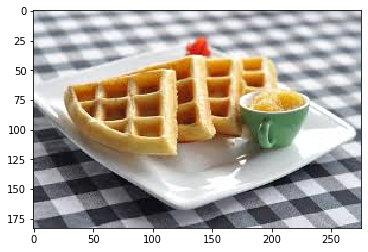

In [3]:
#read the image
image = cv2.imread('images/waffle.jpg')

#make the copy of the image
image_copy = np.copy(image)

#change color to rgb
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

#plot the image
plt.imshow(image_copy)

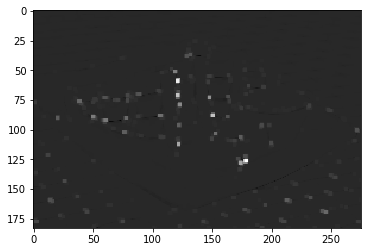

In [10]:
#Detect corner
#convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

#detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

#dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap = 'gray')

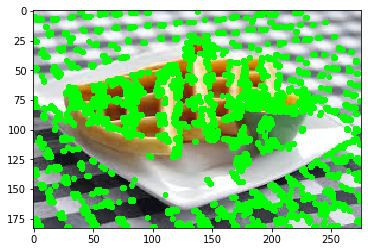

In [15]:
#Exstract display strong corners
thresh = 0.001 * dst.max()

#create image copy to draw corners on
corner_image = np.copy(image_copy)

#iterate through all the corners and draw them on the image
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            #image, center pt, radious, color, thickness
            cv2.circle(corner_image, (i, j), 1, (0, 255, 0), 1)

plt.imshow(corner_image)